## Info-theoretic for Wulf

# Stochastic System Simulation

The Set-Up code has been borrowed from https://ipython-books.github.io/134-simulating-a-stochastic-differential-equation/

Import Dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Parameters for our model

In [2]:
sigma = 1.  # Standard deviation.
mu = 10.  # Mean.
tau = .05  # Time constant.

Simulation parameters

In [3]:
dt = .001  # Time step.
T = 1.  # Total time.
n = int(T / dt)  # Number of time steps.
t = np.linspace(0., T, n)  # Vector of times.

Re-normalized variables (to avoid recomputing these constants at every time step)

In [4]:
sigma_bis = sigma * np.sqrt(2. / tau)
sqrtdt = np.sqrt(dt)

Create a vector that will contain all successive values of our process during the simulation

In [5]:
x = np.zeros(n)

 Euler-Maruyama method

In [6]:
for i in range(n - 1):
    x[i + 1] = x[i] + dt * (-(x[i] - mu) / tau) + \
        sigma_bis * sqrtdt * np.random.randn()

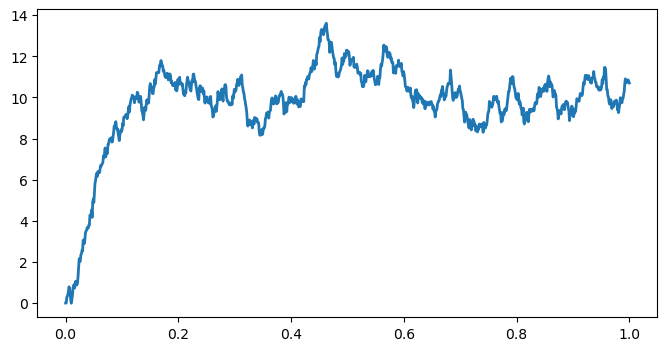

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(t, x, lw=2)

Langevin Equation

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


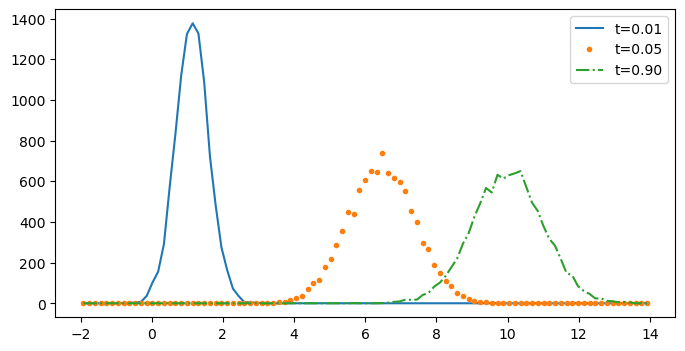

In [8]:
ntrials = 10000
X = np.zeros(ntrials)
# We create bins for the histograms.
bins = np.linspace(-2., 14., 100)
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
for i in range(n):
    # We update the process independently for
    # all trials
    X += dt * (-(X - mu) / tau) + \
        sigma_bis * sqrtdt * np.random.randn(ntrials)
    # We display the histogram for a few points in
    # time
    if i in (5, 50, 900):
        hist, _ = np.histogram(X, bins=bins)
        ax.plot((bins[1:] + bins[:-1]) / 2, hist,
                {5: '-', 50: '.', 900: '-.', }[i],
                label=f"t={i * dt:.2f}")
    ax.legend()

# Projectile Simulation
code at https://cocalc.com/share/public_paths/223c4e9ca1b913a9fa9d1d0f1028d90b7dc0b2d2

Model Parameters

In [10]:
# Model parameters
M = 1.0          # Mass of projectile in kg
g = 9.8          # Acceleration due to gravity (m/s^2)
V = 80           # Initial velocity in m/s
ang = 60.0       # Angle of initial velocity in degrees
Cd = 0.005       # Drag coefficient
dt = 0.5         # time step in s

# You can check the variables by printing them out
print(V, ang)

80 60.0


Check Parameter

In [11]:
# Set up the lists to store variables
# Start by putting the initial velocities at t=0
t = [0]                         # list to keep track of time
vx = [V*np.cos(ang/180*np.pi)]  # list for velocity x and y components
vy = [V*np.sin(ang/180*np.pi)]

# Drag force
drag = Cd*V**2                      # drag force

# Create the lists for acceleration components
ax = [-(drag*np.cos(ang/180*np.pi))/M]
ay = [-g-(drag*np.sin(ang/180*np.pi)/M)]

# Print out some values to check
print(ax[0])
print(ay[0])
print(vx[0])
print(vy[0])

-16.000000000000004
-37.51281292110204
40.00000000000001
69.28203230275508


Velocity Update

t= [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
vx= [40.00000000000001, 32.00000000000001, 27.528951416567008, 24.787883378136915, 23.02339491459251, 21.846818145611152, 21.027776019653995, 20.413445666052425, 19.89116281938412, 19.368416481078107, 18.760291921319446]


Text(0.5, 0, 'time (s)')

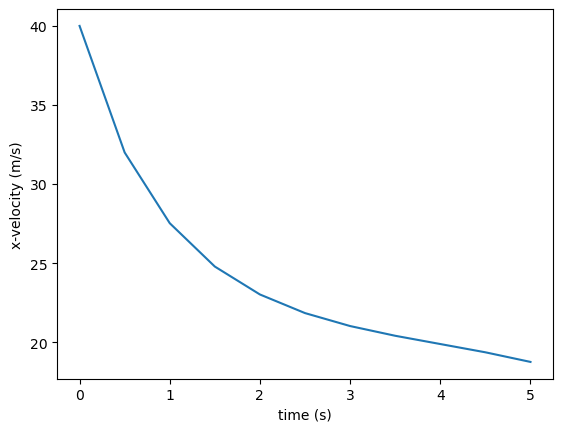

In [13]:
# Use Euler method to update variables
counter = 0
while (counter < 10):
    t.append(t[counter]+dt)                # increment by dt and add to the list of time
    vx.append(vx[counter]+dt*ax[counter])  # Update the velocity
    vy.append(vy[counter]+dt*ay[counter])

    # With the new velocity calculate the drag force
    vel = np.sqrt(vx[counter+1]**2 + vy[counter+1]**2)   # magnitude of velocity
    drag = Cd*vel**2                                   # drag force
    ax.append(-(drag*np.cos(ang/180*np.pi))/M)
    ay.append(-g-(drag*np.sin(ang/180*np.pi)/M))

    # Increment the counter by 1
    counter = counter +1

# Print the values to check
print("t=", t)
print("vx=", vx)

# Let's plot the velocity against time
plt.plot(t,vx)
plt.ylabel("x-velocity (m/s)")
plt.xlabel("time (s)")

Position Update

Range of projectile is 124.9 m


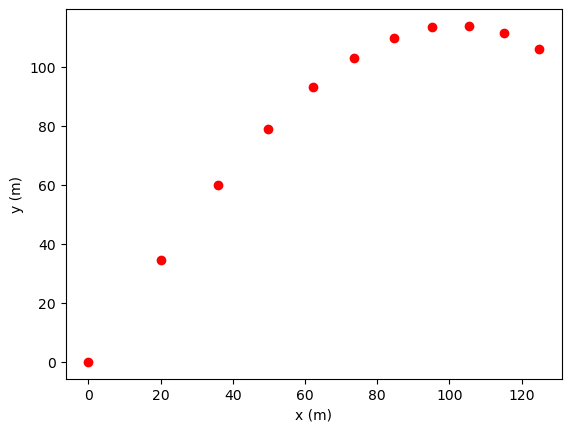

In [14]:
# Initialise the lists for x and y
x = [0]
y = [0]

# Use Euler method to update var
while (counter < 10):
    # Update the positions x and y
    x.append(x[counter]+dt*vx[counter])
    y.append(y[counter]+dt*vy[counter])
    # Increment the counter by 1
    counter = counter +1


# Let's plot the trajectory
plt.plot(x,y,'ro')
plt.ylabel("y (m)")
plt.xlabel("x (m)")
print("Range of projectile is {:3.1f} m".format(x[counter]))

Projectile Simulation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

# Model parameters
M = 1.0          # Mass of projectile in kg
g = 9.8          # Acceleration due to gravity (m/s^2)
V = 80           # Initial velocity in m/s
ang = 60.0       # Angle of initial velocity in degrees
Cd = 0.005       # Drag coefficient
dt = 0.5         # time step in s

# You can check the variables by printing them out
print V, ang

# Set up the lists to store variables
# Initialize the velocity and position at t=0
t = [0]                         # list to keep track of time
vx = [V*np.cos(ang/180*np.pi)]  # list for velocity x and y components
vy = [V*np.sin(ang/180*np.pi)]
x = [0]                         # list for x and y position
y = [0]

# Drag force
drag=Cd*V**2                      # drag force

# Acceleration components
ax = [-(drag*np.cos(ang/180*np.pi))/M ]
ay = [-g-(drag*np.sin(ang/180*np.pi)/M) ]

## Leave this out for students to try
# We can choose to have better control of the time-step here
dt = 0.2

# Use Euler method to update variables
counter = 0
while (y[counter] >= 0):                   # Check that the last value of y is >= 0
    t.append(t[counter]+dt)                # increment by dt and add to the list of time



    # Update velocity
    vx.append(vx[counter]+dt*ax[counter])  # Update the velocity
    vy.append(vy[counter]+dt*ay[counter])

    # Update position
    x.append(x[counter]+dt*vx[counter])
    y.append(y[counter]+dt*vy[counter])

    # With the new velocity calculate the drag force and update acceleration
    vel = np.sqrt(vx[counter+1]**2 + vy[counter+1]**2)   # magnitude of velocity
    drag = Cd*vel**2                                   # drag force
    ax.append(-(drag*np.cos(ang/180*np.pi))/M)
    ay.append(-g-(drag*np.sin(ang/180*np.pi)/M))

    # Increment the counter by 1
    counter = counter +1

# Let's plot the trajectory
plt.plot(x,y,'ro')
plt.ylabel("y (m)")
plt.xlabel("x (m)")

# The last value of x should give the range of the projectile approximately.

print("Range of projectile is {:3.1f} m".format(x[counter]))